In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install glmnet
%pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


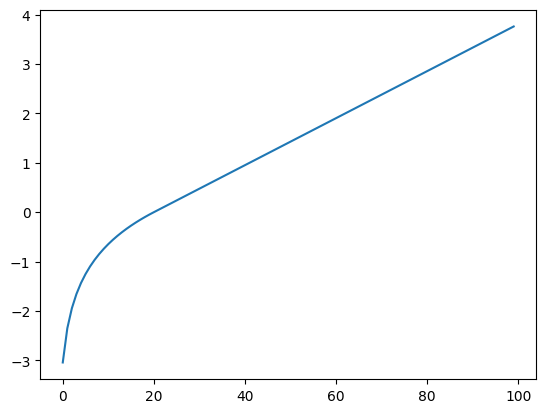

[-3.04452244 -2.35137526 -1.94591015 -1.65822808 -1.43508453 -1.25276297
 -1.09861229 -0.9650809  -0.84729786 -0.74193734 -0.64662716 -0.55961579
 -0.47957308 -0.40546511 -0.33647224 -0.27193372 -0.21130909 -0.15415068
 -0.10008346 -0.04879016  0.          0.04761905  0.0952381   0.14285714
  0.19047619  0.23809524  0.28571429  0.33333333  0.38095238  0.42857143
  0.47619048  0.52380952  0.57142857  0.61904762  0.66666667  0.71428571
  0.76190476  0.80952381  0.85714286  0.9047619   0.95238095  1.
  1.04761905  1.0952381   1.14285714  1.19047619  1.23809524  1.28571429
  1.33333333  1.38095238  1.42857143  1.47619048  1.52380952  1.57142857
  1.61904762  1.66666667  1.71428571  1.76190476  1.80952381  1.85714286
  1.9047619   1.95238095  2.          2.04761905  2.0952381   2.14285714
  2.19047619  2.23809524  2.28571429  2.33333333  2.38095238  2.42857143
  2.47619048  2.52380952  2.57142857  2.61904762  2.66666667  2.71428571
  2.76190476  2.80952381  2.85714286  2.9047619   2.9523809

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def F(age: float, adult_age: float = 20.):
    
    if age <= adult_age:
        y = np.log(age + 1) - np.log(adult_age + 1)
    else:
        y = (age - adult_age) / (adult_age + 1)
    
    return y

age = np.arange(0, 100, 1)
y = np.vectorize(F)(age)

plt.plot(age, y)
plt.show()

print(y)



In [4]:
#import dask as dd



In [5]:
#%%time

#import pandas as pd
#from collections import defaultdict

#dtypes = defaultdict(lambda: 'float32')
#dtypes['ID_REF'] = 'string'

#print('loading...')
#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0, usecols=range(0, 657)).transpose(copy=False)

#print('getting memory...')
#print(feature_df.info(verbose=False, memory_usage='deep'))

#feature_df

In [6]:
%%time

from assignment1 import Assignment1

job = Assignment1(meta_filepath='data/GSE40279_family.soft-MetaData.csv', features_filepath='data/GSE40279_average_beta.txt')

#meta_df = job.load_meta()
#features_df = job.load_features()
X, y = job.load()

processing...
['ID_REF']
CPU times: user 13.6 s, sys: 3.37 s, total: 16.9 s
Wall time: 14.7 s


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42)
print('X', X_train.shape, X_test.shape)
print('Y', y_train.shape, y_test.shape)


model = job.train(X_train=X_train,y_train=y_train, cv_fold=3, parallel_jobs=5)
#meta_df = job.load_meta()
#meta_df

#features_df
#merged_df = meta_df.join(features_df)

#merged_df

X (524, 473034) (132, 473034)
Y (524,) (132,)


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    9.4s finished


In [8]:
import numpy as np

print('n_lambda_', model.n_lambda_)
print('lambda_path_', model.lambda_path_)
print('coef_path_', model.coef_path_)
print('coef_', model.coef_, model.coef_.dtype)
print('coef_ nonzero', np.count_nonzero(np.invert(np.isclose(model.coef_, 0, atol=np.finfo(model.coef_.dtype).tiny, rtol=0))))
print('intercept_', model.intercept_)
print('intercept_', model.intercept_path_)
print('cv_mean_score_', model.cv_mean_score_)
print('cv_standard_error_', model.cv_standard_error_)
print('lambda_max_', model.lambda_max_)
print('lambda_best_', model.lambda_best_)

n_lambda_ 60
lambda_path_ [12.44071124 11.33551274 10.32849703  9.41094182  8.57489969  7.81312923
  7.11903237  6.48659715  5.91034574  5.38528691  4.90687287  4.4709598
  4.07377206  3.71186938  3.38211713  3.08165917  2.80789306  2.55844758
  2.33116215  2.12406813  1.93537177  1.76343868  1.60677964  1.46403777
  1.33397669  1.21546988  1.10749088  1.00910444  0.91945839  0.83777624
  0.76335051  0.69553655  0.633747    0.57744666  0.52614789  0.47940636
  0.43681722  0.39801159  0.36265333  0.33043621  0.30108117  0.27433395
  0.24996288  0.22775686  0.20752357  0.18908775  0.17228971  0.15698397
  0.14303795  0.13033085  0.11875262  0.10820296  0.09859051  0.089832
  0.08185157  0.0745801   0.06795461  0.06191771  0.05641711  0.05140517]
coef_path_ [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
coef_ [0. 0. 0. ... 0. 0. 0.] float64
coef_ nonzero 46
intercept_ 25.1566993584

mean -0.12332336188003584
standard deviation 1.0402057469412038


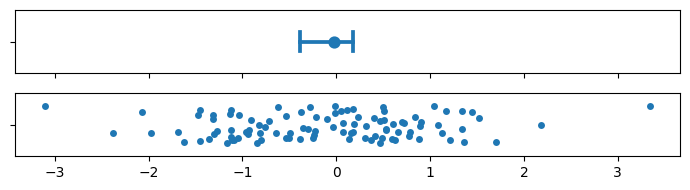

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    
    f, axs = plt.subplots(2, figsize=(7,2), sharex=True, layout='tight')
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])
    
    print('mean', np.mean(x))
    print('standard deviation', np.std(x))
    
plot_errorbars('ci', estimator='median', n_boot=5000, seed=10)
    

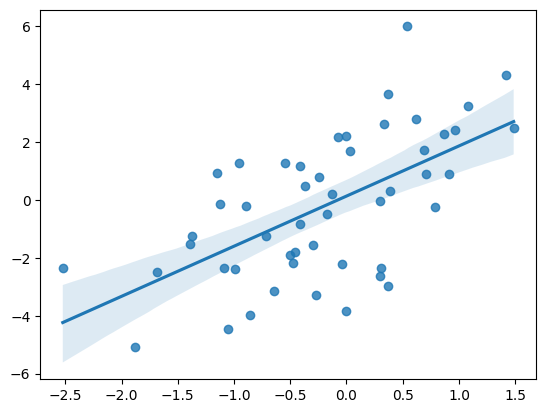

<AxesSubplot: >

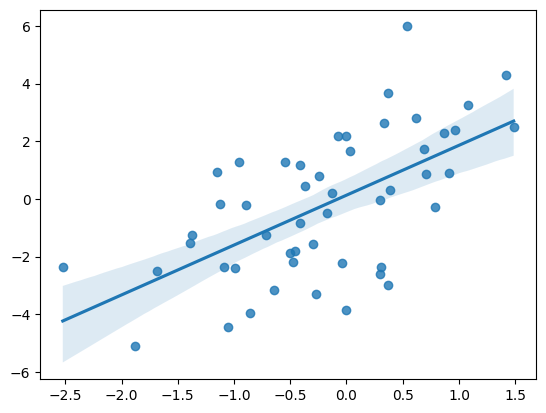

In [10]:
x = np.random.normal(0, 1, 50)
y = x * 2 + np.random.normal(0, 2, size=x.size)

sns.regplot(x=x, y=y, ci=95)
plt.show()
sns.regplot(x=x, y=y)

In [11]:
# one sample t test https://medium.com/@TheDataScience-ProF/one-sample-t-test-in-python-f73eea1a87bf
import scipy.stats as stats

sample = [2, 3, 4, 5, 6, 7, 8, 9, 10]
population_mean = 5

t_statistic, p_value = stats.ttest_1samp(sample, population_mean)

print('t_statistic', t_statistic)
print('p_value', p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Significant differences exist between the sample mean and the population mean.")
else:
    print("Fail to reject the null hypothesis. No significant differences exist between the sample mean and the population mean.")
    
# https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

t_statistic 1.0954451150103321
p_value 0.3052013652062302
Fail to reject the null hypothesis. No significant differences exist between the sample mean and the population mean.


In [12]:
%pip install statsmodels


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


lambda max
lambda:  0.4794063649761707
median_absolute_error 3.3995941253410784
explained_variance_score 0.8785994676598553
root_mean_squared_error 5.590841255031671
r2 0.8784867200853466
t-test Ttest_indResult(statistic=-0.09272825342021432, pvalue=0.9261903158568201)
smstats r2 0.8876139206088123
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1027.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.47e-63
Time:                        09:11:48   Log-Likelihood:                -387.45
No. Observations:                 132   AIC:                             778.9
Df Residuals:                     130   BIC:                             784.7
Df Model:                           1                               

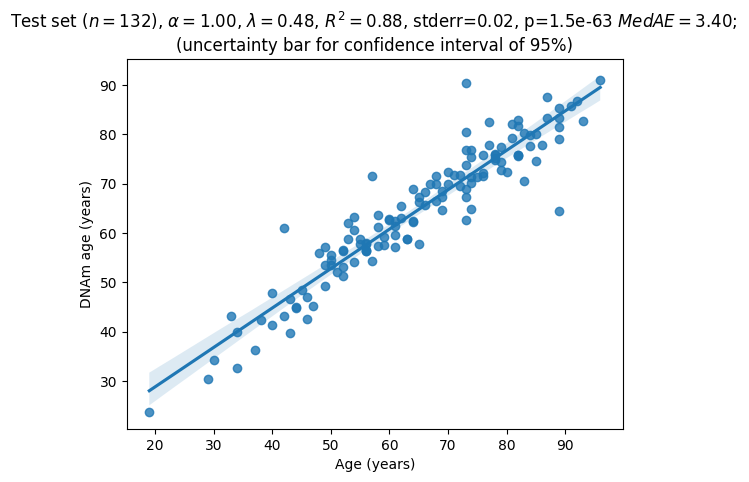

lambda best
lambda:  1.2154698759438596
median_absolute_error 4.108425845406618
explained_variance_score 0.8337722301058156
root_mean_squared_error 6.539327231663587
r2 0.8337599879341978
t-test Ttest_indResult(statistic=-0.03144855589855786, pvalue=0.974935761665687)
smstats r2 0.8518890297287546
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     747.7
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           9.26e-56
Time:                        09:11:51   Log-Likelihood:                -396.17
No. Observations:                 132   AIC:                             796.3
Df Residuals:                     130   BIC:                             802.1
Df Model:                           1                                

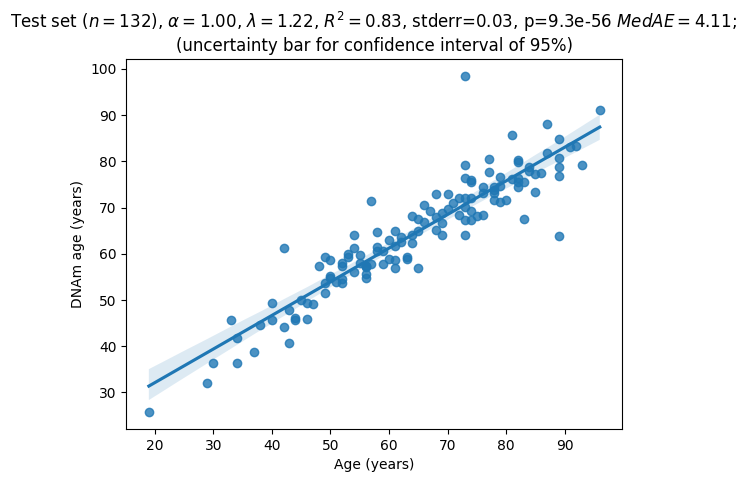

In [13]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, median_absolute_error
import numpy as np
import sigfig
import glmnet
import statsmodels.api as sm
from sklearn.feature_selection import chi2 

def calculate_stats(X_test, y_test, lamb: float, model: glmnet.ElasticNet):
    y_pred = job.predict(X=X_test, lamb=lamb)
    
    print('lambda: ', lamb)
    
    medae = median_absolute_error(y_true=y_test, y_pred=y_pred)
    
    print('median_absolute_error', medae)
    print('explained_variance_score', explained_variance_score(y_test, y_pred))
    print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))
    
    r2 = r2_score(y_test, y_pred)
    print('r2', r2)
    
    independent_samples_t_test = stats.ttest_ind(y_pred, y_test, equal_var=True)
    print('t-test', independent_samples_t_test)
    
    sm_y_test = sm.add_constant(y_test) # column of 1s
    sm_model = sm.OLS(y_pred, sm_y_test).fit()
    print("smstats r2", sm_model.rsquared)
    print(sm_model.summary())
    print('pvalues', sm_model.pvalues)
    
    #chi2_scores, chi2_pvalues = chi2(y_pred, y_test)
    #print('chi2_scores, chi2_pvalues', chi2_scores, chi2_pvalues)
    
    print('glmnet r2', model.score(X=X_test, y=y_test, lamb=lamb))
    
    linregress_result = stats.linregress(y_test, y_pred)
    p_value = sigfig.round(linregress_result.pvalue, sigfigs=2)
    standard_error = linregress_result.stderr
    
    print('stats linregress', linregress_result)
    
    
    # https://seaborn.pydata.org/tutorial/error_bars.html
    sns.regplot(x = y_test, y = y_pred, ci=99, label='alma', n_boot=5000).set(title=f'Test set ($n={np.shape(X_test)[0]}$), $\\alpha={model.alpha:.2f}$, $\lambda={lamb:.2f}$, $R^2={r2:.2f}$, stderr={standard_error:.2f}, p={p_value} $MedAE={medae:.2f}$; \n(uncertainty bar for confidence interval of 95%)', xlabel='Age (years)', ylabel='DNAm age (years)')
    plt.show()

print('lambda max')
calculate_stats(X_test=X_test, y_test=y_test,  lamb=model.lambda_max_, model=model)
print('lambda best')
calculate_stats(X_test=X_test, y_test=y_test,  lamb=model.lambda_best_[0], model=model)

#y_pred = model.predict(X_test)
#print(y_pred)

# compare with the y_test


In [14]:
#import pandas as pd

#meta_df = pd.read_csv('data/GSE40279_family.soft-MetaData.csv', delimiter='|')

# split sample title to get the id
#meta_df.str.split(' ', )

#display(meta_df.head())
#print('size: ', meta_df.shape)

#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0).T

#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0)

#display(feature_df.head())
#print('size: ',feature_df.shape)



In [15]:
#from sklearn.model_selection import train_test_split

#y = meta_df['age (y)'].astype(float)
#print(y, type(y))

#X_train, X_test, y_train, y_test = train_test_split(feature_df, y, test_size=0.2, random_state=42)

#print('X', X_train.shape, X_test.shape)
#print('Y', y_train.shape, y_test.shape)

In [16]:
#from glmnet import ElasticNet

#model = ElasticNet()
#model = model.fit(X_train, y_train)

#print(model)

In [17]:
#import sklearn
#print(sklearn.__version__)